In [1]:
!wget "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip"
!unzip wiki-news-300d-1M.vec.zip
!rm wiki-news-300d-1M.vec.zip

--2024-06-25 14:37:10--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.7.50, 13.35.7.38, 13.35.7.128, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.7.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M   110MB/s    in 6.9s    

2024-06-25 14:37:17 (94.4 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [2]:
!pip install word-vectors scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for file-or-name: filename=file_or_name-1.1.6-py3-none-any.whl size=8115 sha256=e762cdf06026752e180d78f295867ab81d69c5956dff4f6018ec6f72fadbb998
  Stored in directory: /root/.cache/pip/wheels/a8/68/b1/6fa6284cfa55b3be86bc5b52feb27b012d86258ccba0572b6e
Successfully built file-or-name


In [3]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552451 sha256=2ee49158a958eccd6ce6da9146dc2adc390ac12a22009941ba4d36cce3af4393
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [4]:
from word_vectors import read

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
v, wv = read("./wiki-news-300d-1M.vec")

In [6]:
len(v), wv.shape

(999994, (999994, 300))

In [7]:
(wv[0] ** 2).sum() ** 0.5, np.linalg.norm(wv[0])

(1.664355471614996, 1.6643555)

In [8]:
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [9]:
idx_king = v["king"]
idx_queen = v["queen"]
idx_bottle = v["bottle"]

In [10]:
cosine_sim(wv[idx_king], wv[idx_queen]), cosine_sim(wv[idx_king], wv[idx_bottle])

(0.76385385, 0.34601676)

The high similarity score between "king" and "queen", and the low score between "king" and "bottle" verifies that what we've done so far is correct. Let us plot these vectors in 2D.

## TODO
- get k similar words to a given query word
- showcase the famous king-man+woman=queen example!

In [11]:
list(v.keys())[:5]

[',', 'the', '.', 'and', 'of']

In [12]:
wv[:].shape

(999994, 300)

In [13]:
query_word = "king"
similarity_dict = {}

for word, idx in v.items():
    similarity_dict[word] = cosine_sim(wv[idx], wv[v[query_word]])

In [14]:
similarity_dict = {k: v for k,v in sorted(similarity_dict.items(), key=lambda item: item[1], reverse=True)}

In [15]:
def get_top_k_similar_words(query_word: str | npt.NDArray, k: int = 10):
    similarity_dict = {}

    if isinstance(query_word, str):
        query_word = wv[v[query_word]]

    for word, idx in v.items():
        similarity_dict[word] = cosine_sim(wv[idx], query_word)

    similarity_dict = {k: v for k,v in sorted(similarity_dict.items(), key=lambda item: item[1], reverse=True)}
    return list(similarity_dict.items())[:k]

In [16]:
get_top_k_similar_words("king")

[('king', 1.0),
 ('kings', 0.7969563),
 ('queen', 0.76385385),
 ('monarch', 0.73999715),
 ('King', 0.7281953),
 ('prince', 0.71327305),
 ('kingdom', 0.701478),
 ('ruler', 0.67771),
 ('royal', 0.6696851),
 ('emperor', 0.6599919)]

In [17]:
get_top_k_similar_words(wv[v["king"]] - wv[v["man"]] + wv[v["woman"]])

[('king', 0.8655095),
 ('queen', 0.7673766),
 ('monarch', 0.69558007),
 ('kings', 0.69295466),
 ('princess', 0.6909605),
 ('woman', 0.65289754),
 ('lady', 0.62861866),
 ('prince', 0.62221336),
 ('kingdom', 0.6208547),
 ('royal', 0.6090125)]

Ignoring ([as done by the authors](https://github.com/tmikolov/word2vec/blob/master/word-analogy.c#L120-L122)) "King", "man" and "woman" from the results, we get "Queen" as the closest match!

In [18]:
get_top_k_similar_words(wv[v["queen"]] - wv[v["woman"]] + wv[v["man"]])

[('queen', 0.86514395),
 ('king', 0.74810934),
 ('queens', 0.7166972),
 ('Queen', 0.64782816),
 ('kings', 0.6251778),
 ('monarch', 0.61508614),
 ('royal', 0.572546),
 ('queen.', 0.5669484),
 ('ant', 0.56559515),
 ('uncrowned', 0.5653542)]

In [19]:
get_top_k_similar_words(wv[v["woman"]] - wv[v["girl"]] + wv[v["boy"]])

[('woman', 0.8509131),
 ('man', 0.8293935),
 ('boy', 0.746706),
 ('men', 0.6425862),
 ('father', 0.64043474),
 ('child', 0.63676286),
 ('mother', 0.6289613),
 ('lady', 0.6255889),
 ('soldier', 0.62286997),
 ('person', 0.6204231)]

In [20]:
get_top_k_similar_words(wv[v["mouse"]] + wv[v["keys"]])

[('mouse', 0.8467821),
 ('keys', 0.8205895),
 ('keyboard', 0.73110205),
 ('mice', 0.6779792),
 ('mouses', 0.6236643),
 ('key', 0.6178266),
 ('cursor', 0.61595786),
 ('keyboards', 0.6078147),
 ('scroll-wheel', 0.6005548),
 ('keyset', 0.5945325)]

In [21]:
mouse_words = get_top_k_similar_words(wv[v["mouse"]], k=50)
sim_word_vec = np.array([wv[v[word]] for word,_ in mouse_words])

In [22]:
pca_reduced = PCA(n_components=50).fit_transform(sim_word_vec)
pca_reduced.shape

(50, 50)

In [23]:
tsne_reduced = TSNE(n_components=2).fit_transform(pca_reduced)
tsne_reduced.shape

(50, 2)

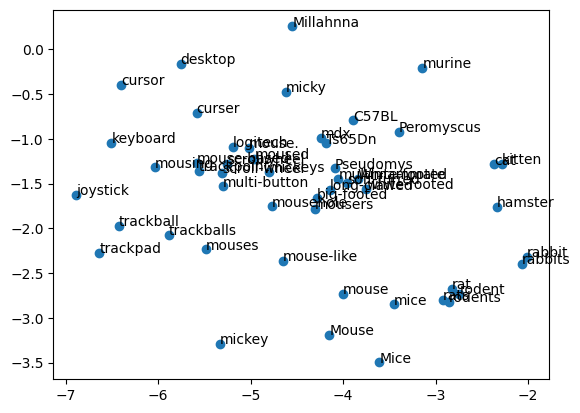

In [24]:
x, y = tsne_reduced[:, 0], tsne_reduced[:, 1]
fig, ax = plt.subplots()
ax.scatter(x, y)

for i,label in enumerate(mouse_words):
    ax.annotate(label[0], (x[i], y[i]))

plt.show()

## TODO

- Index and run ANN using spotify Annoy

In [32]:
from annoy import AnnoyIndex

f = wv.shape[1]
t = AnnoyIndex(f, "angular")
for i, (word, vec) in enumerate(zip(v.keys(), wv)):
    t.add_item(i, vec)

In [ ]:
t.build(100, n_jobs=-1)

In [35]:
t.save("fasttext_wiki-news-300d-1M.vec_100trees.ann")

True

In [36]:
# load saved index
# t = AnnoyIndex(f, "angular")
# t.load("fasttext_wiki-news-300d-1M.vec_100trees.ann")

In [41]:
i2w = {val:k for k,val in v.items()}

In [44]:
idxs, dists = t.get_nns_by_item(v["king"], 10, include_distances=True)

In [51]:
sorted([(i2w[idx], dists[i]) for i,idx in enumerate(idxs)], reverse=True, key=lambda item: item[1])

[('princess', 0.838099479675293),
 ('emperor', 0.8246307969093323),
 ('royal', 0.8127913475036621),
 ('ruler', 0.8028574585914612),
 ('kingdom', 0.7726863026618958),
 ('prince', 0.757267415523529),
 ('monarch', 0.7211143374443054),
 ('queen', 0.6872350573539734),
 ('kings', 0.6372497081756592),
 ('king', 0.0)]